## Analysing Gaia data with Jupyter: Part 1 Basic Hertzsprung Russel diagram
Extracting the Hertzrprung Russel Diagram from a dataset of the Gaia mission

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)  #increase column restriction to 500 to see all the columns in the output field
df = pd.read_csv("http://cdn.gea.esac.esa.int/Gaia/gedr3/gaia_source/GaiaSource_000000-003111.csv.gz") #download one dataset from the esa website
df.head()  #show the first 5 rows 

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat
0,1636042515805110273,Gaia EDR3 27373445780865792,27373445780865792,35626517,2016.0,43.947169,0.086807,10.506889,0.085681,0.640986,0.104295,6.145886,4.797702,-1.552430,0.128578,-4.539593,0.106490,0.152493,0.086212,0.053571,0.092647,-0.316549,-0.014376,0.168402,0.261222,0.051973,0.137133,191,0,191,0,-0.589401,181.12413,0.000000,0.000000,95,False,NaN,1.430543,0.027109,0.054198,0.016221,0.014805,-0.245116,0.005694,22,15,0.182273,24,24,0,0.028054,109.18130,0,0,0.967733,0.294204,0.195036,0.460919,0.890772,-91.21395,-30.371275,-46.545048,29.167576,False,198,1991.996753,2.608010,763.79960,17.439146,20,777.588451,15.098847,51.499855,18.111668,24,1759.051348,12.584990,139.773760,16.634699,0.0,0.0,0.0,2.0,0.0,1.273416,1.476969,0.672522,0.804447,NaN,NaN,0,NaN,NaN,NaN,165.837234,-41.777269,44.620348,-5.976486
1,1636042515805110273,Gaia EDR3 27373578924429824,27373578924429824,1584903114,2016.0,43.968418,0.112703,10.535261,0.108339,1.407174,0.129308,10.882307,3.262094,2.905771,0.171472,1.482481,0.142865,0.147402,0.042020,0.153724,0.001275,-0.291500,-0.063699,0.138973,0.202945,0.042553,0.112445,180,0,179,1,-0.511118,171.55246,0.000000,0.000000,31,False,1.340659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,15,0.241652,24,8,0,0.022933,118.92712,0,0,0.970829,0.251048,0.193885,0.423693,0.885283,-90.77888,-27.745210,-45.664307,29.320944,False,196,1454.907029,2.219517,655.50620,17.780280,22,419.093166,14.114084,29.693260,18.782766,22,1510.979428,12.232132,123.525440,16.799750,0.0,0.0,0.0,0.0,0.0,1.326595,1.983017,1.002487,0.980530,NaN,NaN,0,NaN,NaN,NaN,165.835852,-41.742050,44.648677,-5.955330
2,1636042515805110273,Gaia EDR3 27373583219244288,27373583219244288,1210067922,2016.0,43.970030,0.902078,10.537569,1.009531,1.206808,0.891932,1.353027,4.726398,4.002686,1.774744,2.513432,1.756357,0.489176,-0.160778,0.502961,0.344469,-0.330327,0.274298,0.577828,0.029916,-0.239342,0.410081,141,0,138,3,-1.922398,107.62329,0.000000,0.000000,95,False,NaN,1.689086,0.243967,-0.014851,0.003954,0.105637,-0.159613,0.087664,16,12,2.987540,18,4,0,0.188214,75.86337,0,0,0.881627,0.241297,0.305189,0.403258,0.869768,-75.85202,-41.092712,-45.001633,30.505554,False,147,129.586029,1.234597,104.96225,20.405972,14,49.0

calculating the magnitude and plotting the diagram

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


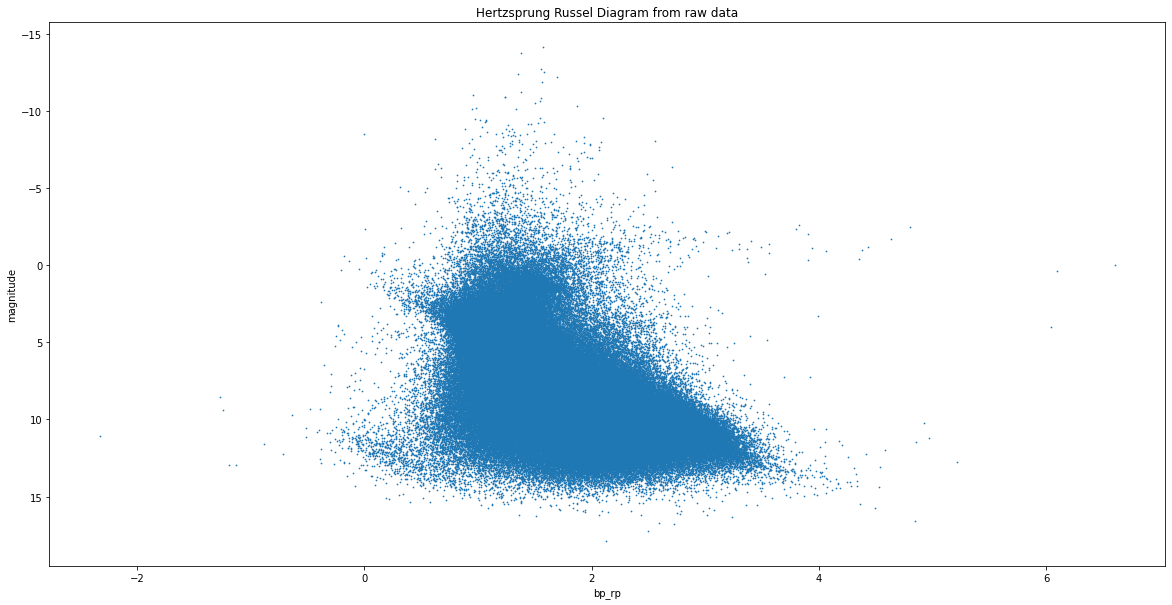

In [ ]:
#plt.rcParams["figure.figsize"] = (20,10)

df["magnitude"]=df["phot_g_mean_mag"]+5+5*np.log10(df["parallax"]/1000) # calculate magnitude 
df.plot.scatter(x="bp_rp",y="magnitude",s=0.5, title="Hertzsprung Russel Diagram from raw data", figsize=(20,10)).invert_yaxis() #plot magnitude vs bp_rp


Filtering for data with a parallax accuracy <5% to just use accurate data

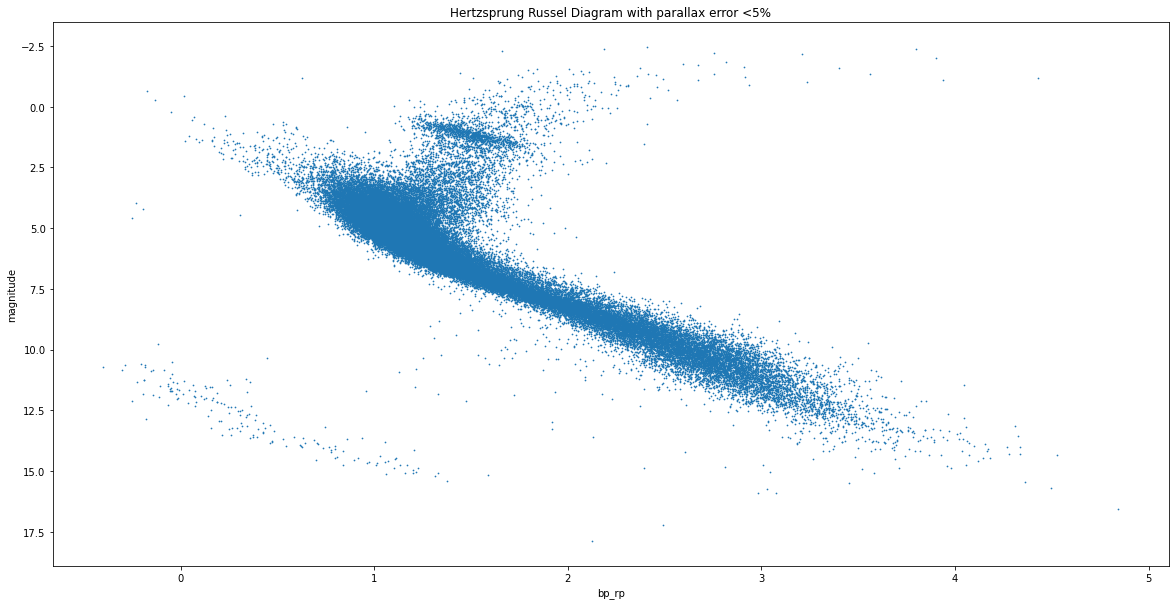

In [ ]:
mask=(df["parallax_error"]/df["parallax"]<0.05) & (df["parallax"]>0) # filter for data with parallax error <5%
df[mask].plot.scatter(x="bp_rp",y="magnitude",s=0.5, title="Hertzsprung Russel Diagram with parallax error <5%", figsize=(20,10)).invert_yaxis() #plot magnitude vs bp_rp with applied filter